# Esame SMDA
## MASTER IN BIG DATA ANALYTICS AND SOCIAL MINING 2024
### Andrea Alessandrelli

9 Aprile 2024



***

## 1. Exercise (4.5 point total. 1.5 each)

1.1. You are renovating your house and you need a sofa. You go to the PoltroneSofa shop and find a sofa whose declared length is 180 cm. You take a tape and measure the sofa’s length 18 times. The average of the measurements you obtain is 182 cm. You need to test if the true height is 180 cm. Which test should you use?

(1) Kolmogorov-Smirnov test 

(2) t-test

(3) F-test

(4) chi-squared test

(5) None of the above


RISPOSTA: (2)

1.2. You also need two pillows of different size. Each pillow is measured 40 times. Which
test should you use to test if the two variances are the same?

(1) Kolmogorov-Smirnov test 

(2) t-test

(3) F-test

(4) chi-squared test

(5) None of the above


RISPOSTA: (3)

1.3. A group of researchers is investigating the effectiveness of three different teaching methods on improving students’ performance. They conducted an experiment with 90 students randomly divided into three groups, with 30 students in each group. After the experiment, they recorded whether each student passed or failed the final exam, resulting in a contingency table. The researchers want to test the null hypothesis that the teaching method and students’ exam performance are independent. Which test should they use?

(1) Kolmogorov-Smirnov test 

(2) t-test

(3) F-test

(4) chi-squared test

(5) None of the above

RISPOSTA: (4)

***
***
***

## 2. Exercise (12 points total)

Given the results of a chemical analysis of wines grown in the same region in Italy (derived from three different cultivars), a researcher wants to analyze the relationship between the 13 constituents found. Dataset: wine.csv

(1) Describe the dataset; compute the average, variance, and quartiles of ’total_phenols’ and ’color_intensity’. Plot them in a scatterplot. (1.5 points)

(2) compute the covariance between all the columns and plot the results in a heatmap (1.5 points)

(3) are ’total_phenols’ and ’color_intensity’; ’total_phenols’ and ’alcohol’ correlated according to the Spearman correlation? Is it significant (95%)? Write explicitly the answer. (2 points)

(4) Use the linear regression model (WITH intercept) to describe the data above: y=’alcohol’,
x= ’color intensity’ then plot (scatterplot). Has the predictor x a significant influence on the
response, at the 95% confidence level? Motivate your answer. (3 points)

(5) use the linear regression model (WITH intercept) to describe the data above:

1. y=’alcohol’, x= [’color_intensity’,’proline’].
2. y=’alcohol’, x= [’color_intensity’,’proline’,’magnesium’] 

Formally, which predictors have a significant influence on the response, at the 95% confidence level? Motivate your answer. Which model performs better? Discuss in detail the quantities that need to be considered (and those that do not). (4 points)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('wine.csv')
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


(1)

In [3]:
# comando per ottenere le statistiche descrittive del dataset, inclusi i quantili
data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


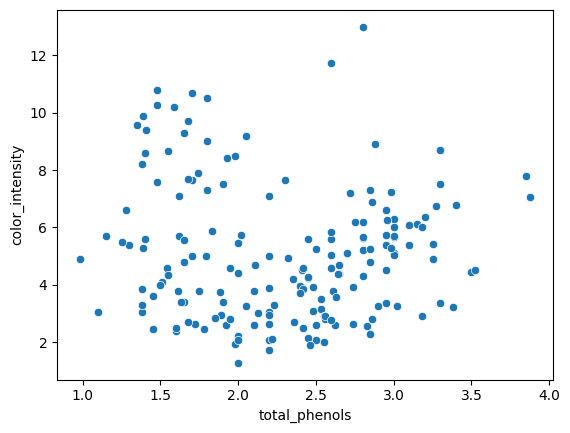

In [4]:
sns.scatterplot(data, x= 'total_phenols' , y='color_intensity')
plt.show()

(2)

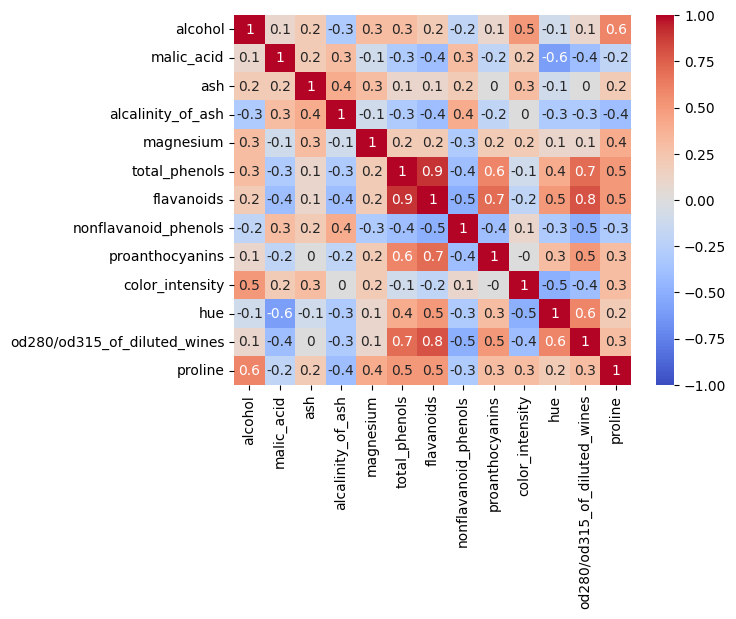

In [5]:
sns.heatmap(data.corr().round(1),annot=True,cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

(3)

In [6]:
from scipy.stats import pearsonr 
from scipy.stats import spearmanr
import statsmodels.api as sm
import numpy as np

In [7]:
print('total_phenols-color_intensity')
print(spearmanr(data['total_phenols'], data['color_intensity']))
print('\n\ntotal_phenols-alcohol')
print(spearmanr(data['total_phenols'], data['alcohol']))

total_phenols-color_intensity
SignificanceResult(statistic=0.011161793956834237, pvalue=0.8824435092354216)


total_phenols-alcohol
SignificanceResult(statistic=0.31092006981517456, pvalue=2.3985318938106053e-05)


- Per il coefficente di correlazione di Spearman con un livello di significatività del 95% NON si può rifiutare l'ipotesi nulla che 'total_phenols' e 'color_intensity' siano scorrelati
- Invece per il coefficente di correlazione di Spearman con un livello di significatività del 95% si può rifiutare l'ipotesi nulla che 'total_phenols' e 'alcohol' siano scorrelati

(4)

In [8]:
X = sm.add_constant(data[['color_intensity']])
y = data[['alcohol']]

lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                alcohol   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     74.90
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.06e-15
Time:                        19:24:03   Log-Likelihood:                -183.41
No. Observations:                 178   AIC:                             370.8
Df Residuals:                     176   BIC:                             377.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.0329      0.123     97.868      0.000      11.790      12.276
color_intensity     0.1913      0.022      8.654      0.000       0.148       0.235
==============================================================================
Omnibus:                        2.882   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.136
Skew:                           0.099   Prob(JB):                        0.344
Kurtosis:                       2.501   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/15/28q_ssxd08v248d65c73hv3h0000gn/T/ipykernel_12561/3450050449.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.plot(x, x*lm.params[1]+lm.params[0], color='r')


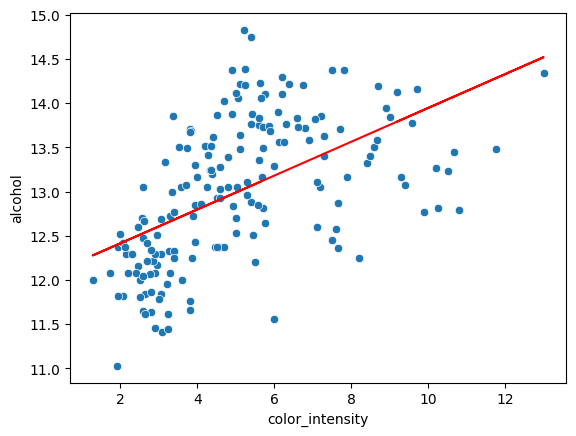

In [9]:
x = np.array(data[['color_intensity']].values)
sns.scatterplot(data, x= 'color_intensity' , y='alcohol')
plt.plot(x, x*lm.params[1]+lm.params[0], color='r')
plt.show()

In [10]:
lm.params
lm.conf_int(alpha=0.05)

,0,1
const,11.790217,12.275510
color_intensity,0.147697,0.234959


Come si evince sia dal summary() che da 'lm.conf_int(alpha=0.05)' il parametro della regressione lineare legato a 'color_intensity' è diverso da 0 al 95% di significatività, quindi influisce nella determinazione di y

(5)

In [11]:
X2 = sm.add_constant(data[['color_intensity', 'proline']])
y = data[['alcohol']]
lm2 = sm.OLS(y,X2).fit()



X3 = sm.add_constant(data[['color_intensity', 'proline', 'magnesium']])
y = data[['alcohol']]

lm3 = sm.OLS(y,X3).fit()

In [12]:
print('AIC 1° modello')
print(lm.aic)


print('\n\nAIC 2° modello')
print(lm2.aic)

print('\n\nAIC 3° modello')
print(lm3.aic)

AIC 1° modello
370.8138523254096


AIC 2° modello
295.75829503362104


AIC 3° modello
297.6996464072716


In [13]:
print(lm2.summary())
lm2.conf_int(alpha=0.05)

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     104.8
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.19e-30
Time:                        19:24:04   Log-Likelihood:                -144.88
No. Observations:                 178   AIC:                             295.8
Df Residuals:                     175   BIC:                             305.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3183      0.123     

,0,1
const,11.074544,11.561958
color_intensity,0.096257,0.170547
proline,0.001076,0.001623


**PARAMETRI SECONDO MODELLO**

Nel secondo modello ad un livello di significatività del 95% per tutti i parametri della regressione possiamo rigettare l'ipotesi nulla che essi siano zero

In [14]:
print(lm3.summary())
lm3.conf_int(alpha=0.05)

                            OLS Regression Results                            
Dep. Variable:                alcohol   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     69.51
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.35e-29
Time:                        19:24:04   Log-Likelihood:                -144.85
No. Observations:                 178   AIC:                             297.7
Df Residuals:                     174   BIC:                             310.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              11.3826      0.296     

,0,1
const,10.798602,11.966606
color_intensity,0.096407,0.171183
proline,0.001068,0.001655
magnesium,-0.007022,0.005503


**PARAMETRI TERZO MODELLO**

Nel terzo modello ad un livello di significatività del 95% per i parametri relativi a ['const', 'color_intensity' e 'proline'] della regressione possiamo rigettare l'ipotesi nulla che essi siano zero

Mentre per ['magnesium'] (sempre con un livello di significatività del 95 %) NON possiamo rigettare l'ipotesi nulla che sia uguale a zero

**MODEL SELECTION**

Il modello migliore è quello con l'AIC più basso ovvero il secondo modello (quello con 'color_intensity' e 'proline')

***
***
***

## 3. Exercise (10 points total)


The dataset diagnoses.csv contains features computed from digitized images of fine needle aspirate (FNA) of a breast mass. The features describe various characteristics X of cell nuclei present in the images. Each instance in the dataset represents a sample from a patient, and the task is to predict whether the sample is benign (y = 0) or malignant (y = 1).

(1) Compute the Pearson correlation coefficient between ’smoothness1’ and ’compactness1’; ’smooth- ness1’ and ’texture1’. Then discuss if they are significant at the 95% confidence level. (2 points)

(2) Write down the logistic regression model: X=[’texture1’, ’area1’, ’compactness1’, ’concave_points1’]], y=’diagnosis’. Fit WITHOUT the constant. (3 points)

(3) Look at the output of the logistic regression model. Formally, which predictors have a significant influence on the response, at the 95% confidence level? Motivate your answer. (3 points)

(4) Estimate the probability for y = 1 with X_test1=[18,500,0.2,0.05] and X_test2=[10,40,0.14,0.06]. What would be your prediction for y in these cases? (2 points)

In [15]:
data=pd.read_csv('diagnoses.csv')
data.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,1


(1)

In [16]:
print('smoothness1-compactness1')
print(pearsonr(data['smoothness1'], data['compactness1']))


print('\n\nsmoothness1-texture1')
print(pearsonr(data['smoothness1'], data['texture1']))



smoothness1-compactness1
PearsonRResult(statistic=0.6591232152159225, pvalue=3.403822261701272e-72)


smoothness1-texture1
PearsonRResult(statistic=-0.02338851599842355, pvalue=0.5776965879839978)


* per il coeff di pearson tra 'smoothness1-compactness1' al 95% di significatività si può rigettare l'ipotesi nulla (esso è significativamente diverso da 0)

* per il coeff di pearson tra 'smoothness1-texture1' al 95% di significatività NON si può rigettare l'ipotesi nulla 

(2)

In [17]:
X = data[['texture1', 'area1', 'compactness1', 'concave_points1']]
y = data[['diagnosis']]

In [18]:
lreg_no_const = sm.Logit(y,X).fit()

Optimization terminated successfully.
         Current function value: 0.301824
         Iterations 8


(3)

In [19]:
lreg_no_const.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              diagnosis   No. Observations:                  569
Model:                          Logit   Df Residuals:                      565
Method:                           MLE   Df Model:                            3
Date:                Tue, 09 Apr 2024   Pseudo R-squ.:                  0.5429
Time:                        19:24:04   Log-Likelihood:                -171.74
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                 4.169e-88
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
texture1           -0.1084      0.028     -3.933      0.000      -0.162      -0.054
area1              -0.0015      0.001     -1.714      0.087      -0.003       0.000
compactness1      -42.9420      6.178     -6.951      0.000     -55.050     -30.834
concave_points1   149.4942     14.874     10.050      0.000     120.341     178.648
===================================================================================
"""

Solo per il regressore relativo a 'area1' ad un livello di significatività del 95% NON si può rigettare l'ipotesi NULLA, tutti gli altri sono significativamente (al 95%) diversi da zero

(4)

In [20]:
X_test1=[18,500,0.2,0.05]
X_test2=[10,40,0.14,0.06]

In [21]:
print('\nX_test1')
prob_pred_1 = lreg_no_const.predict(X_test1)
print(prob_pred_1)
print('Classe predetta: '+str(list(map(round,prob_pred_1))[0]))

print('\nX_test2')
prob_pred_2 = lreg_no_const.predict(X_test2)
print(prob_pred_2)
print('Classe predetta: '+str(list(map(round, prob_pred_2))[0]))


X_test1
[0.02198603]
Classe predetta: 0

X_test2
[0.85996362]
Classe predetta: 1


***
***
***

## 4. Exercise (7 points total)


Given the dataset grades.csv

(1) Test if write is normally (i.e. Gaussian) distributed by performing a Kolmogorov-Smirnov test, with a confidence level of 95%. Discuss the results. (2 points)

(2) plot a QQ plot; write against Gaussian quantiles to check whether the sample is normal (i.e. Gaussian) (2 points)

(3) Compute the confidence interval, with a confidence level of 95%, of the mean of the variable read and median of the variable science with a number of bootstrap samples equal to 500.
(3 points)

In [22]:
data=pd.read_csv('grades.csv')
data.head()

,read,write,math,science,socst
0,57,52,41,47,57
1,68,59,53,63,61
2,44,33,54,58,31
3,63,44,47,53,56
4,47,52,57,53,61


(1)

In [23]:
from scipy.stats import kstest
from scipy.stats import norm

In [24]:
mu = np.mean(data['write'])
st = np.std(data['write'])

In [25]:
kstest(data['write'], 'norm', args=(mu,st))

KstestResult(statistic=0.13485672359472245, pvalue=0.0012392145128983477, statistic_location=59, statistic_sign=-1)

Al livello di significatività del 95% possiamo rifiutare l'ipotesi che 'write' segua una distribuzione gaussiana

(2)

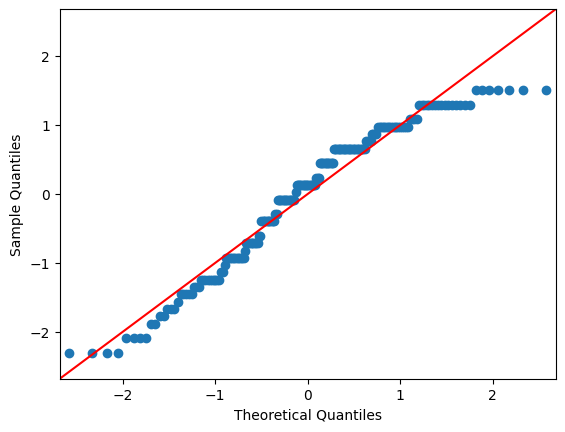

In [26]:
sm.qqplot((data['write']-mu)/st, line ='45') 
plt.show()

(3)

In [27]:
import random
from random import choices
from collections import Counter

In [28]:
n_boot = 500
MEAN = []
MEDIAN = []
for i in np.arange(n_boot):
    idx = choices(data.index, k= len(data))
    data_temp = data.iloc[idx]
    mean_temp = np.mean(data_temp['read'])
    median_temp = np.median(data_temp['science'])
    MEAN.append(mean_temp)
    MEDIAN.append(median_temp)

In [29]:
np.quantile(MEAN, [0.025, 0.975])

array([50.82975 , 53.642625])

In [30]:
np.quantile(MEDIAN, [0.025, 0.975])

array([50., 55.])

***
***
***

## 5. Exercise (6.5 points total)

Suppose we observe n realizations y1,y2,...,yn of n independent random variables, Y1,Y2,...,Yn all
having a normal (i.e. Gaussian) distribution with mean μY and variance σY2 . Consider the following
alternativeestimatorforσ2 ,thevarianceoftheY,wherec>0: Z= 1 Pn (Y −μ )2 Y i (n−c)2 i=1 i Y
We want to illustrate that this estimator is a biased estimator for σY2 . Fix c = 4 and implement the estimator above.

(1) Randomly draw 20 observations from the normal (i.e. Gaussian) distribution with mean 5 and variance 16 and compute an estimate using Z. Repeat this procedure 5000 times. (2 points)
write

(2) Plot a histogram and cumulative distribution of Z. (2 points)

(3) A simple computation shows that E[Z] = n σ2 Is Z biased or unbiased? Is Z asymptotically
(n−4)2 Y unbiased? Motivate your answer. (2.5 points)

In [31]:
def extim(x,mu,c=4):
    tot = 0
    for i in x:
        tot = tot +(i-mu)**2
    Z = tot / (len(x)-c)**2
    return Z

(1)

In [43]:
time = 5000
Z = []
for i in np.arange(time):
    x = norm(loc = 5, scale = 4).rvs(size = 20)
    Z.append(extim(x,5))

(2)

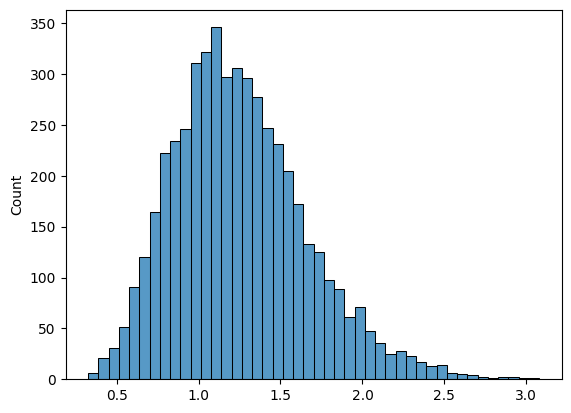

In [44]:
sns.histplot(Z)
plt.show()

In [45]:
np.mean(Z)

1.253301208426339

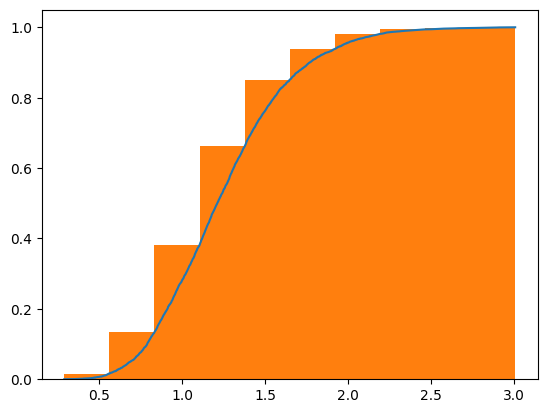

In [34]:
y = np.arange(1, len(Z)+1)/len(Z)
x = np.sort(Z)
plt.plot(x,y)
plt.hist(Z, cumulative=True, density=True)
plt.show()

(3)

E' uno stimatore bias poichè $E[Z]\neq \sigma_Y^2$ 

Inoltre è anche asintoticamente biased poichè anche se $n\to\infty$ avremo sempre $E[Z]\neq \sigma_Y^2$ anzi avremo $E[Z]\xrightarrow[n\to\infty]{}0$